## Author: Paweł Jelonek <br> Date: 20.05.2021
### Machine learning course:<br> Lecture 3 - Learning scheme + metrics

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import svm, datasets
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix, mean_squared_error, mean_absolute_error

plt.rcParams["figure.figsize"]=(20, 10)

In [405]:
iris_db = pd.read_csv('iris.csv')

In [406]:
iris_db.head()

,sepal length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###	1. Zakodować schemat uczenia
<ol type="a">
  <li>Hold-out: (b/duże zbiory danych) jednokrotny podział na część treningową i testową. Wyliczane są
  jednokrotnie metryki na zbiorze testowym.</li>
  <li>k-fold CV (Cross-Validation): (średnie zbiory danych) k-krotna walidacja krzyżowa czyli k-krotny podział
  zbioru (domyślnie k=10) i uczenie/testowanie wg. schematu: (k-1)-części do uczenia, jedna wyłączona część do
  testowania. Obliczane metryki są uśredniane po wszystkich iteracjach.</li>
  <li>LOO (Leave-One-Out): (b/małe zbiory danych) walidacja krzyżowa, w której k=(liczba danych). Oznacza to
  wyłączenie w każdej iteracji jednego przykładu do testowania i uczenie na pozostałych. Metryki obliczone w każdej
   iteracji są uśredniane.</li>
</ol>

### 2.	W metodzie Hold-out i k-fold CV powinna być możliwość sparametryzowania:
<ol type="a">
    <li>metody przydziału do zbioru testowego: losowo lub wg. naturalnej kolejności danych</li>
    <li>klas objętych schematem: wszystkie lub wybrane (np. wg. nazwy/indeksu)</li>
</ol>

### 3.	W metodzie LOO powinna być możliwość sparametryzowania klas objętych schematem: wszystkie lub wybrane (np. wg. nazwy/indeksu).

### 4.	Zademonstrować działanie przygotowanego schematu (podział, liczność zbiorów) na dowolnym zbiorze danych przeznaczonym do klasyfikacji np. Iris (https://archive.ics.uci.edu/ml/machine-learning-databases/iris/). Sama metoda uczenia/testowania może być pusta.


#### a) Hold-out

In [407]:
def hold_out(data: pd.DataFrame, test_size: float, random: bool, columns: list = None, indices: list = None):
    columns = [] if columns is None else columns
    indices = [] if indices is None else indices

    if len(list(columns)) > 0:
        new_data = data.filter(list(columns), axis=1)
    else: new_data = data.copy()

    new_data = new_data.iloc[indices] if len(list(indices)) > 0 else new_data

    if random:
        mask = np.random.rand(len(new_data)) < test_size
    else:
        a = np.linspace(0, 1.0, len(new_data))
        mask = a < test_size

    return new_data[~mask], new_data[mask]

#### Natural ordering

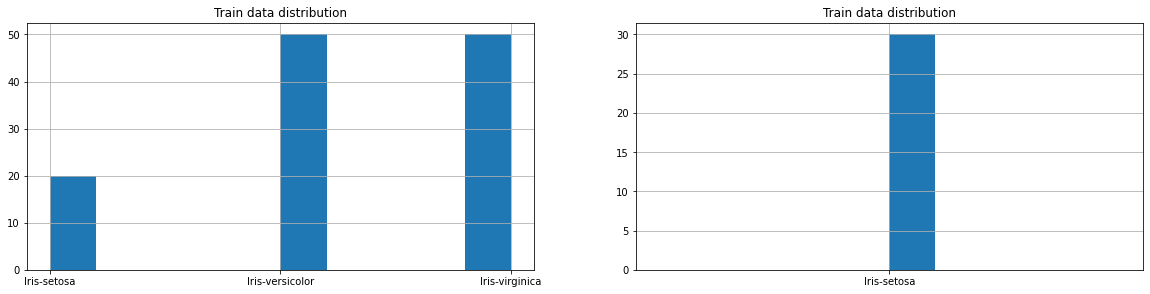

In [408]:
train_data, test_data = hold_out(data=iris_db, test_size=0.2, random=False)
plt.subplot(2, 2, 1)
train_data['class'].hist()
plt.title('Train data distribution')

plt.subplot(2, 2, 2)
test_data['class'].hist()
plt.title('Train data distribution')
plt.show()

#### Natural ordering without first 20 indices

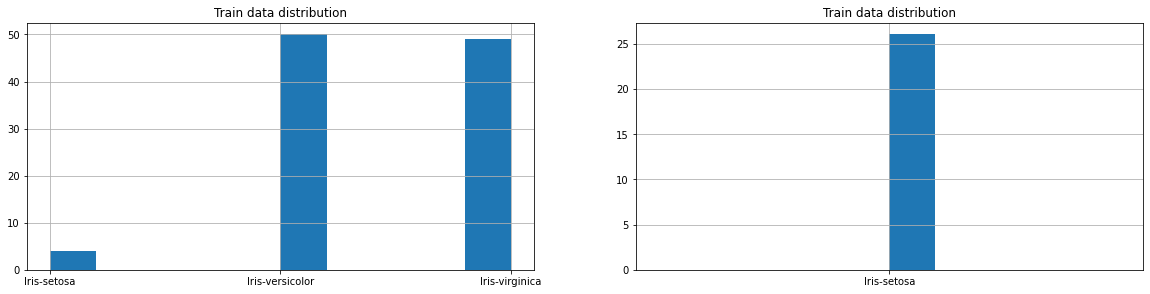

In [409]:
train_data, test_data = hold_out(data=iris_db, test_size=0.2, random=False, indices= range(20, len(iris_db)-1))
plt.subplot(2, 2, 1)
train_data['class'].hist()
plt.title('Train data distribution')

plt.subplot(2, 2, 2)
test_data['class'].hist()
plt.title('Train data distribution')
plt.show()

#### Random ordering

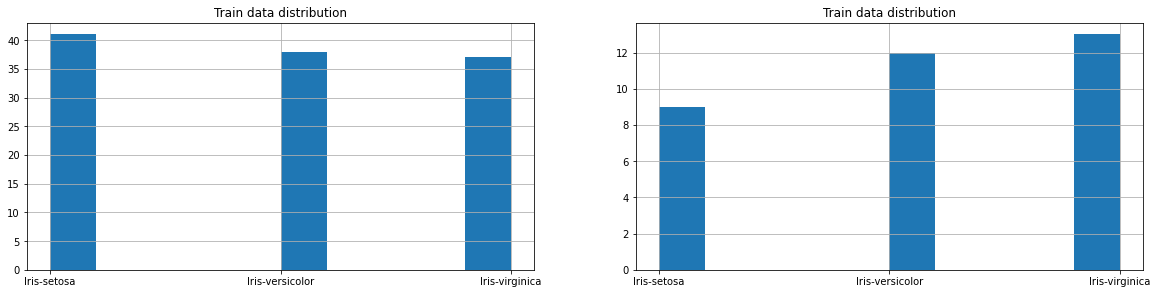

In [410]:
train_data, test_data = hold_out(data=iris_db, test_size=0.2, random=True)
plt.subplot(2, 2, 1)
train_data['class'].hist()
plt.title('Train data distribution')

plt.subplot(2, 2, 2)
test_data['class'].hist()
plt.title('Train data distribution')
plt.show()

#### b) cross-validation

In [411]:
def cross_validation(data: pd.DataFrame, splits: int = 10, random: bool = False, columns: list = None, indices: list = None):
    columns = [] if columns is None else columns
    indices = [] if indices is None else indices

    if len(list(columns)) > 0:
        new_data = data.filter(list(columns), axis=1)
    else:
        new_data = data.copy()

    new_data = new_data.iloc[indices] if len(list(indices)) > 0 else new_data

    k_fold = KFold(n_splits=splits, random_state=None, shuffle=random)

    train_data_array = []
    test_data_array = []
    for train_data_split, test_data_split in k_fold.split(new_data):
        train_data_array.append(new_data.iloc[train_data_split])
        test_data_array.append(new_data.iloc[test_data_split])

    return train_data_array, test_data_array

#### Natural order 10 splits

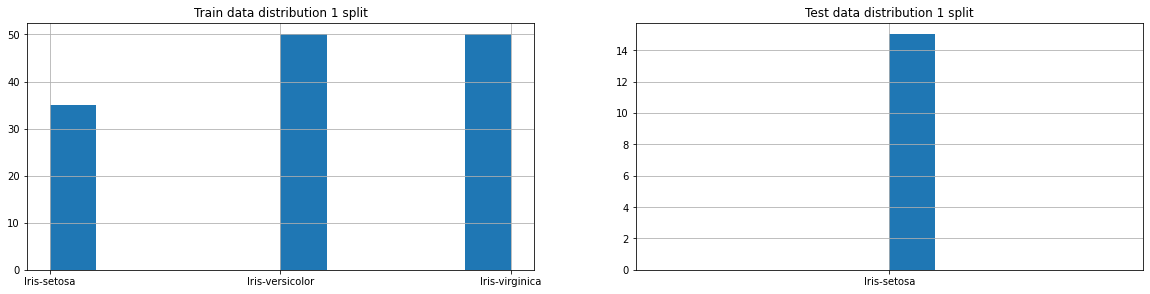

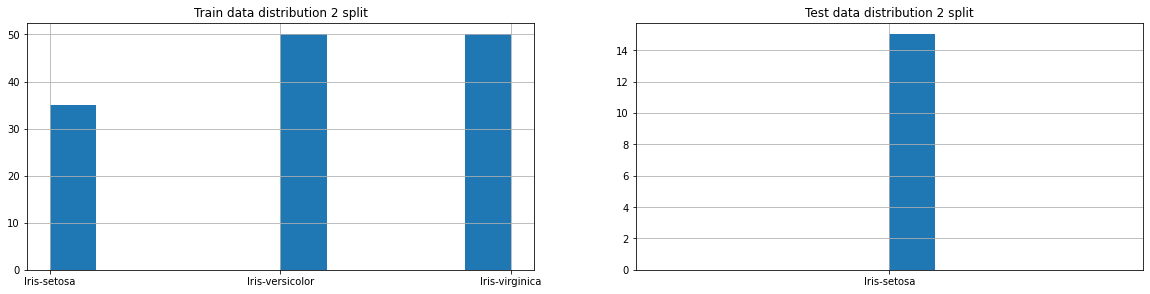

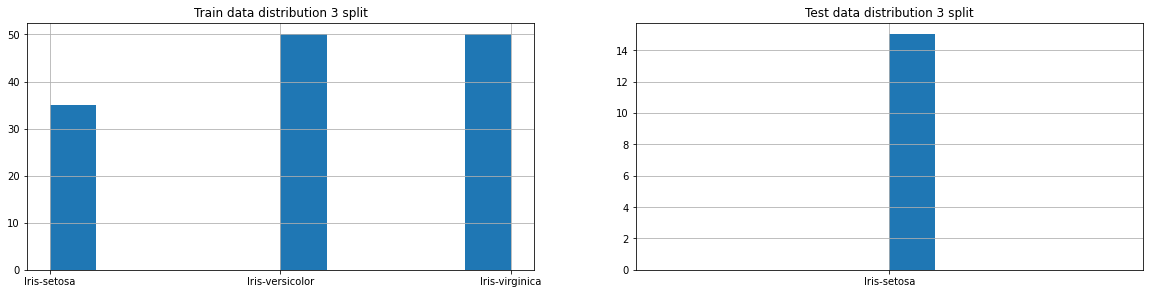

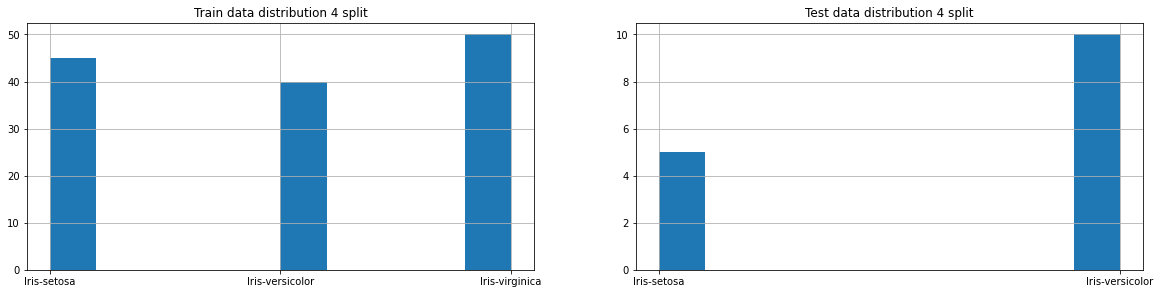

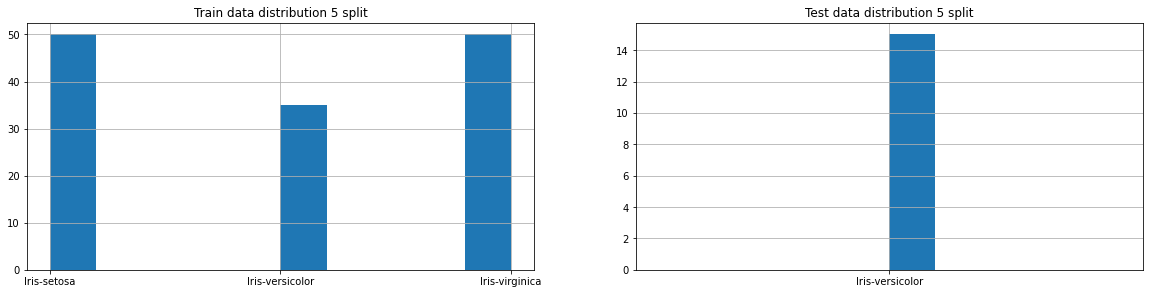

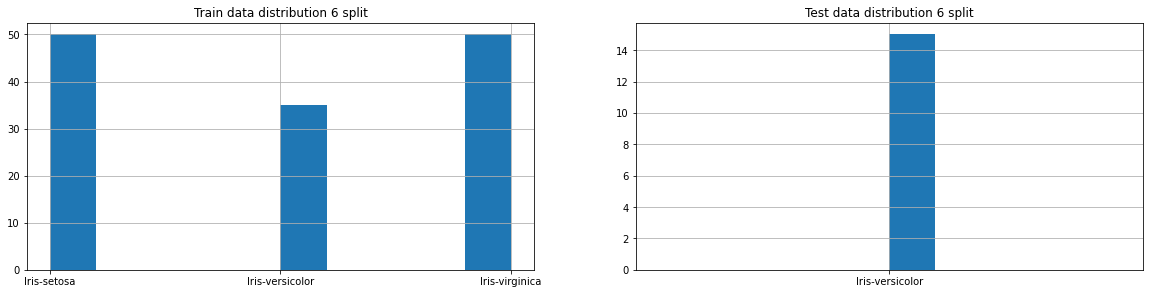

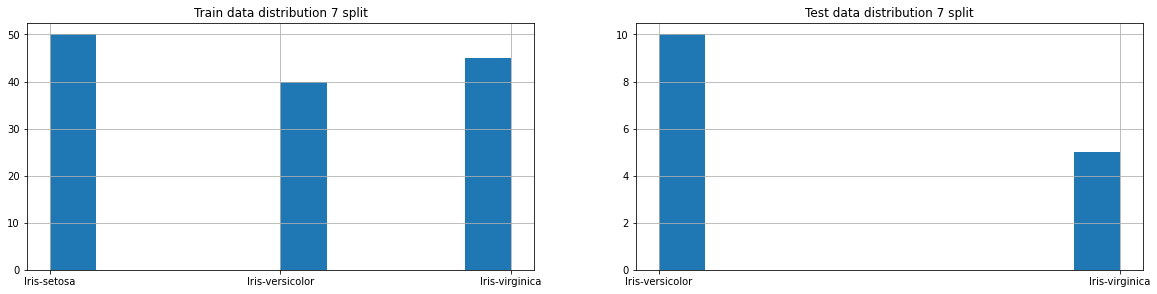

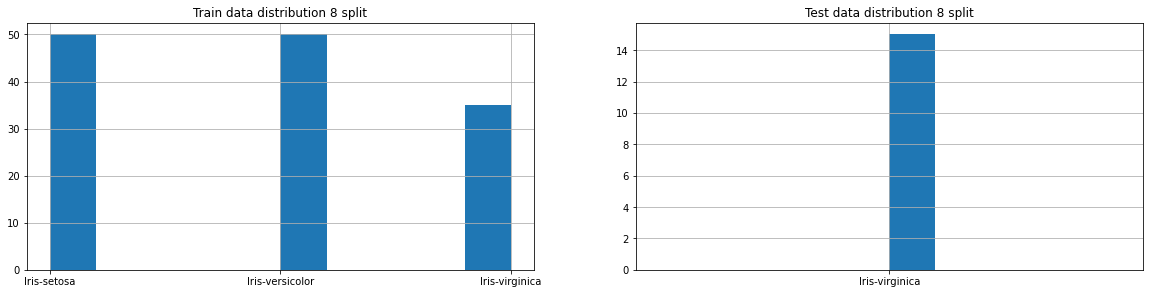

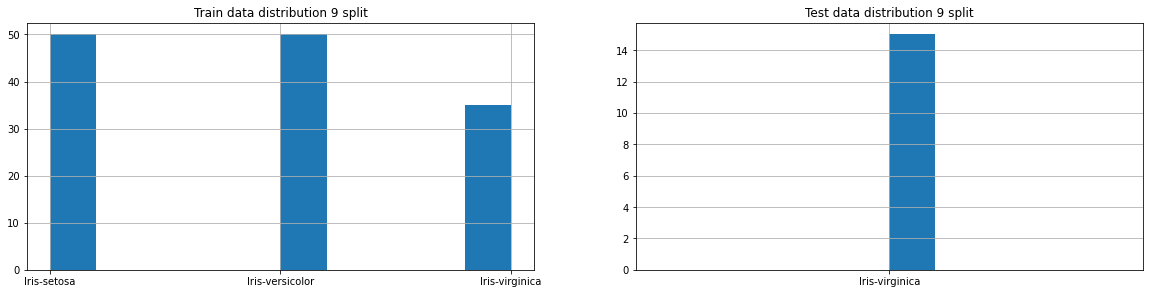

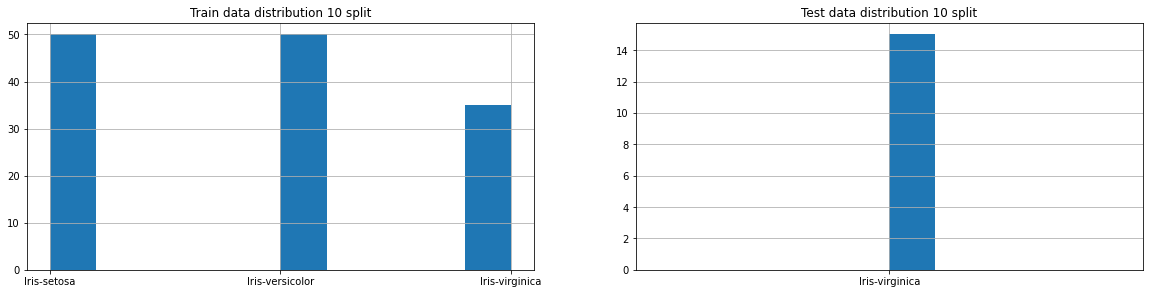

In [412]:
train_data, test_data = cross_validation(data=iris_db, random=False)
splits = 10
for index in range(0, splits):
    plt.subplot(2, 2, 1)
    train_data[index]['class'].hist()
    plt.title('Train data distribution {} split'.format(index+1))

    plt.subplot(2, 2, 2)
    test_data[index]['class'].hist()
    plt.title('Test data distribution {} split'.format(index+1))
    plt.show()

#### Natural order 4 splits

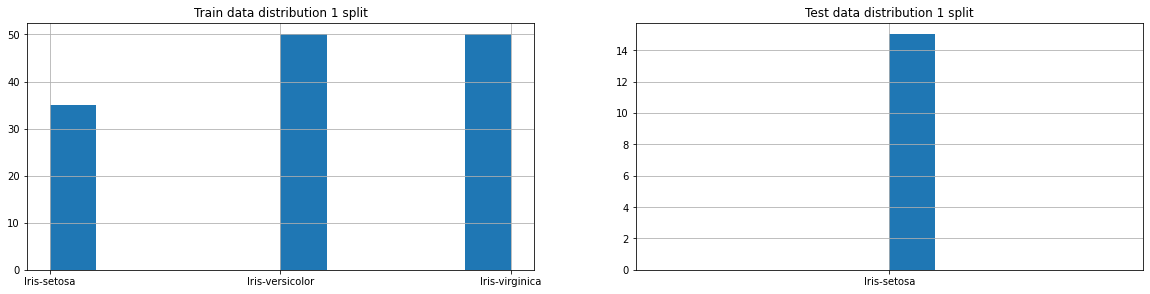

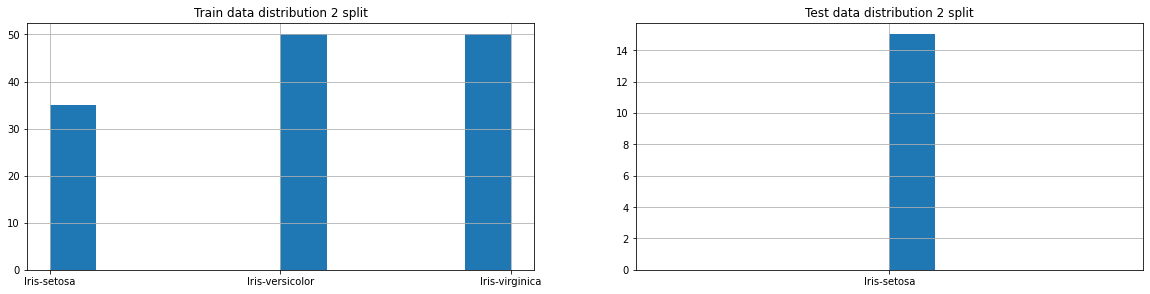

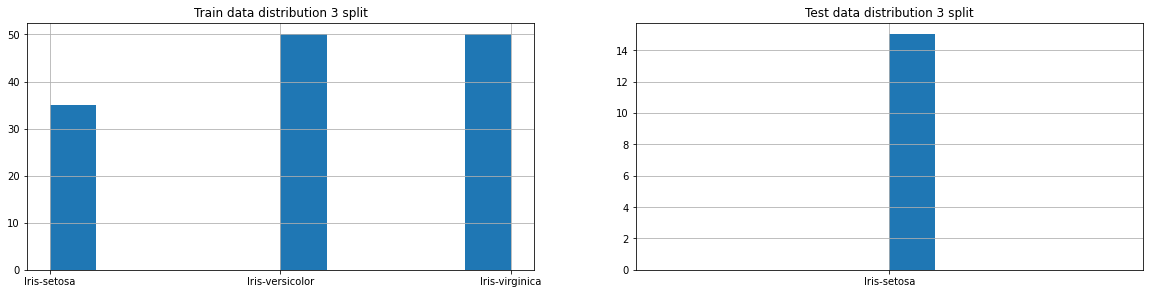

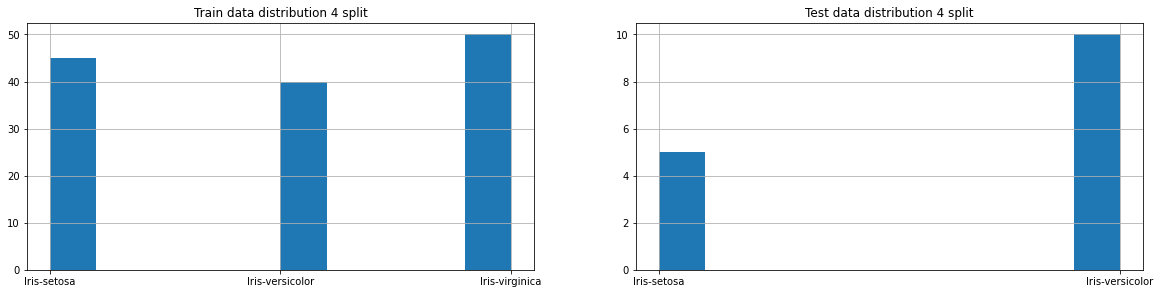

In [413]:
train_data, test_data = cross_validation(data=iris_db, random=False)
splits = 4
for index in range(0, splits):
    plt.subplot(2, 2, 1)
    train_data[index]['class'].hist()
    plt.title('Train data distribution {} split'.format(index+1))

    plt.subplot(2, 2, 2)
    test_data[index]['class'].hist()
    plt.title('Test data distribution {} split'.format(index+1))
    plt.show()


#### Random order 4 splits

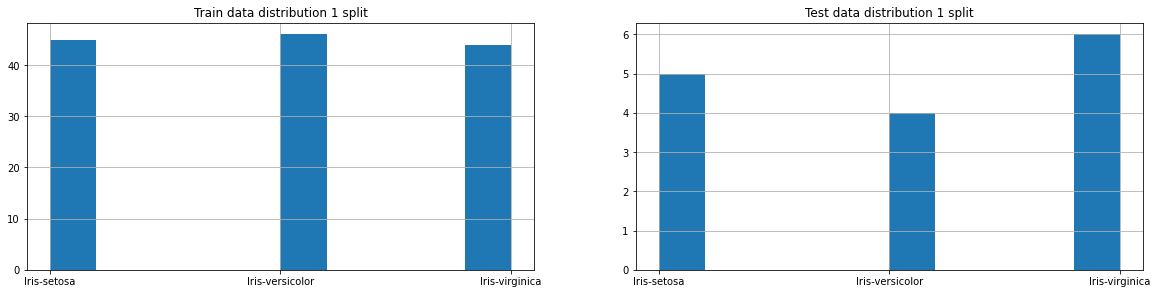

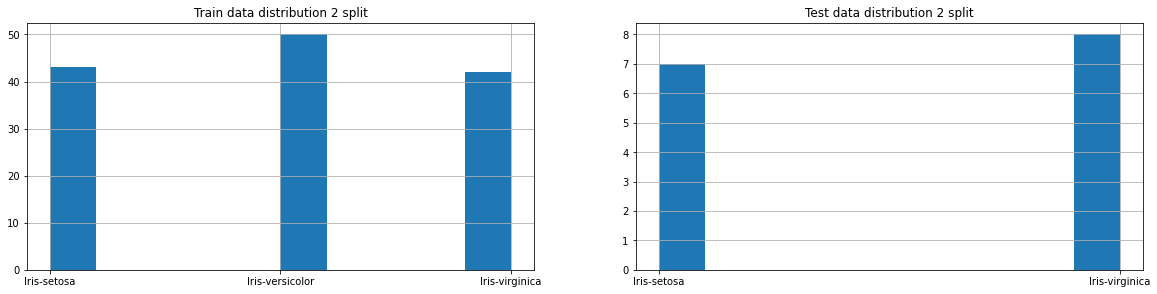

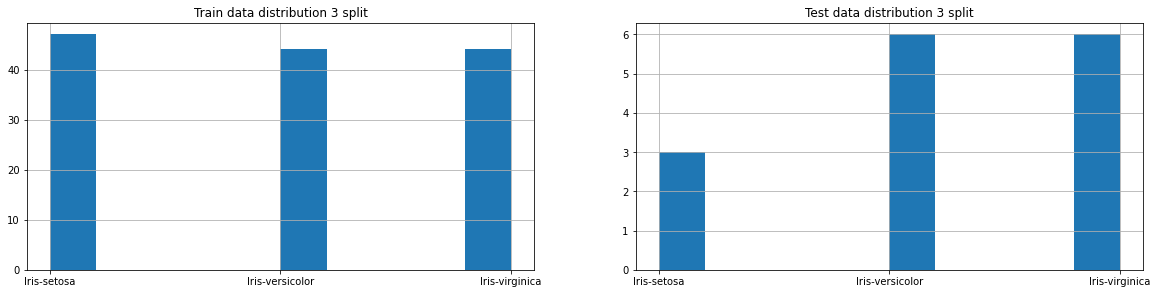

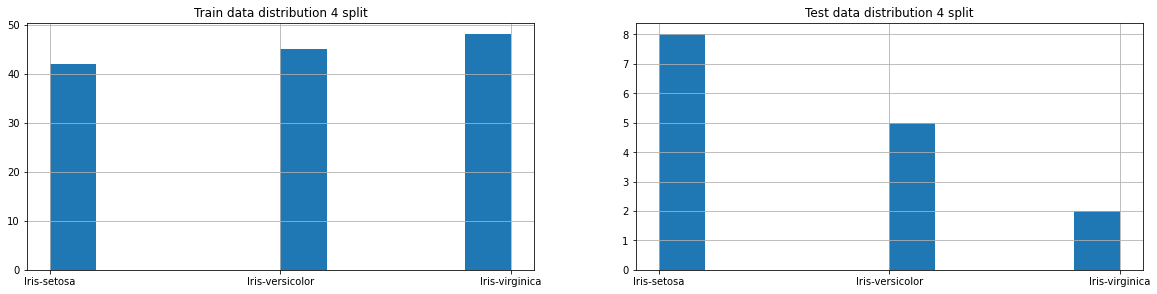

In [414]:
train_data, test_data = cross_validation(data=iris_db, random=True)
splits = 4
for index in range(0, splits):
    plt.subplot(2, 2, 1)
    train_data[index]['class'].hist()
    plt.title('Train data distribution {} split'.format(index+1))

    plt.subplot(2, 2, 2)
    test_data[index]['class'].hist()
    plt.title('Test data distribution {} split'.format(index+1))
    plt.show()

#### c) leave-one-out

In [415]:
def leave_one_out(data: pd.DataFrame, columns: list = None, indices: list = None):
    columns = [] if columns is None else columns
    indices = [] if indices is None else indices

    if len(list(columns)) > 0:
        new_data = data.filter(list(columns), axis=1)
    else:
        new_data = data.copy()

    new_data = new_data.iloc[indices] if len(list(indices)) > 0 else new_data

    k_fold = KFold(n_splits=len(new_data), random_state=None, shuffle=False)

    train_data_array = []
    test_data_array = []
    for train_data_split, test_data_split in k_fold.split(new_data):
        train_data_array.append(new_data.iloc[train_data_split])
        test_data_array.append(new_data.iloc[test_data_split])

    return train_data_array, test_data_array

#### Natural order for 15 indices

In [416]:
# range_test = range(60, 120)
# train_data, test_data = leave_one_out(data=iris_db, indices= range_test)
# splits = len(range_test)
# x = 1
# for index in range(0, splits):
#     plt.subplot(4, 4, x)
#     train_data[index]['class'].hist()
#     plt.title('Train data distribution {} split'.format(index+1))
#
#     plt.subplot(4, 4, x+1)
#     test_data[index]['class'].hist()
#     plt.title('Test data distribution {} split'.format(index+1))
#     plt.show()
#     x = x + 2 if x == 1 else 1

#### 5. W pewnym klasyfikatorze binarnym dla etykiet y=[0,0,1,0,1,0,0,1,1,1,0,1] przewidziano:
#### y ̂=[-0.6,0.9,1.3,0.6,5,-2,0,1,1.5,3,0.2,5]. Narysuj krzywą ROC i oblicz AUC.

roc_auc:  1.0


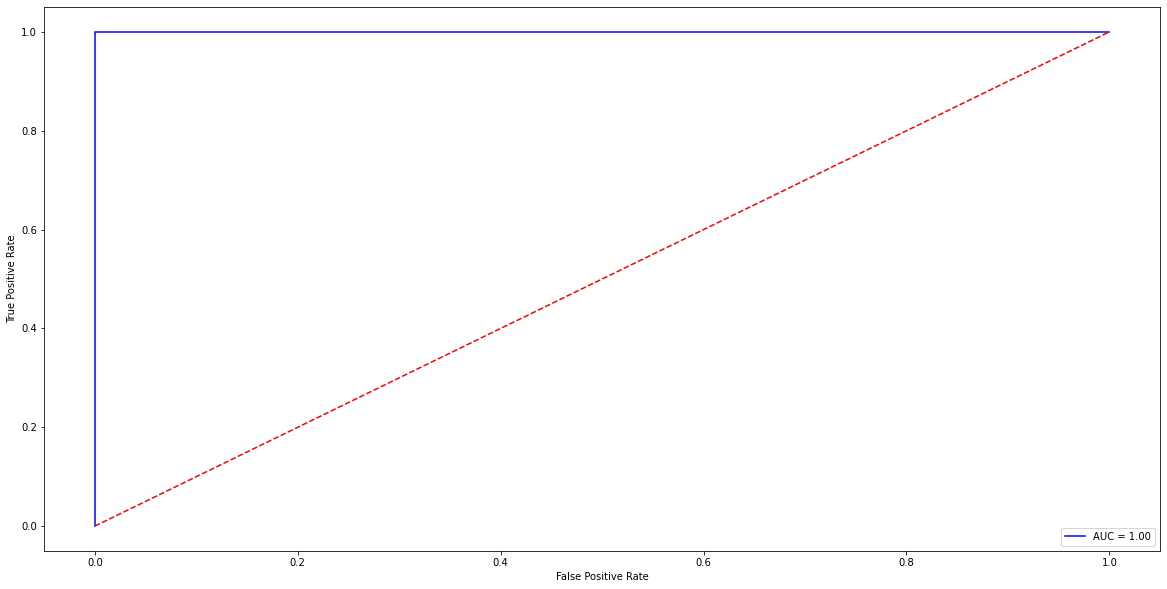

In [417]:
y_test = [0,0,1,0,1,0,0,1,1,1,0,1]
y_score = [-0.6,0.9,1.3,0.6,5,-2,0,1,1.5,3,0.2,5]
false_positive_rate1, true_positive_rate1, _ = roc_curve(y_test, y_score, drop_intermediate=False)
roc_auc = auc(false_positive_rate1, true_positive_rate1)

print('roc_auc: ', roc_auc)

plt.plot(false_positive_rate1, true_positive_rate1, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show("ROC curve")
plt.show()

6.	Dla dowolnych danych i dowolnego klasyfikatora wyliczyć i narysować macierz błędu.

In [418]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]


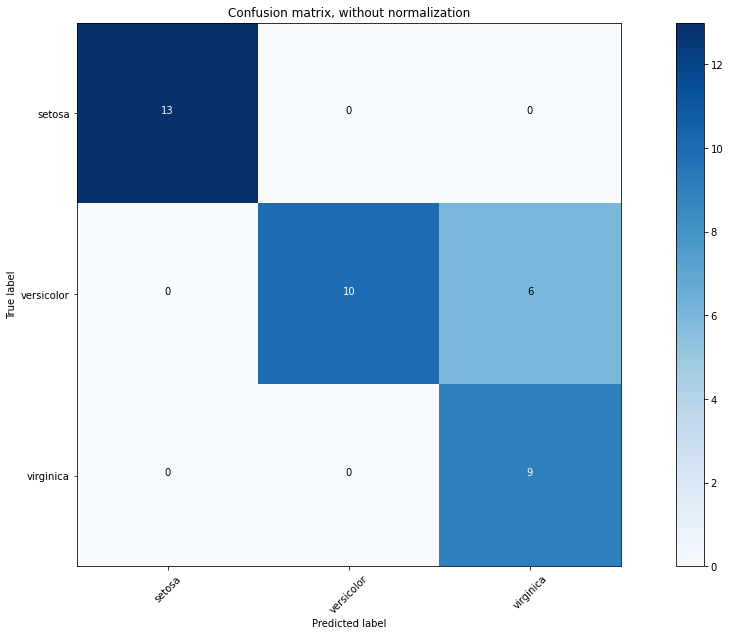

In [419]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
# plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

#### 7.	Zakodować w Pythonie własną metodę do rysowania krzywej ROC i wyliczania puktu optymalnego (punkt na krzywej ROC najbliższy: czułość=100%, specyficzność=100%). Przetestować na dowolnym klasyfikatorze lub wymyślonym zestawie:
### <center>$\frac{etykiety prawdziwe (y)}{etykiety przewidywane (ypred)}$</center>

#### 8.	Dla dowolnych danych i dowolnego problemu regresji wyliczyć typowe metryki: MSE (Mean Squared Error) i MAE (Mean Absolute Error).

In [420]:
y_test = [19, 32, 55, 23, 64, 32, 64]
y_score = [16, 36, 67, 23, 67, 32, 67]
print("Mean squared error: {}".format(mean_squared_error(y_test, y_score)))
print("Mean absolute error: {}".format(mean_absolute_error(y_test, y_score)))

Mean squared error: 26.714285714285715
Mean absolute error: 3.5714285714285716
